<a href="https://colab.research.google.com/github/kkimyunjoo/24-1-ESAA/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
#필요한 라이브러리 불러오기
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/와인 품질 분류/test.csv')
train = pd.read_csv('/content/drive/MyDrive/24-1 ESAA/와인 품질 분류/train.csv')

In [ ]:
train.head(5)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head(5)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


Heatmap으로 상관관계 파악하기

->  quality와 상관 계수가 가장 높은 변수는 alcohol

In [ ]:
# type white와 red 두 종류 0,1 로 변환
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
train['type']

0       1
1       0
2       1
3       1
4       1
       ..
5492    1
5493    1
5494    1
5495    1
5496    1
Name: type, Length: 5497, dtype: int64

<Axes: >

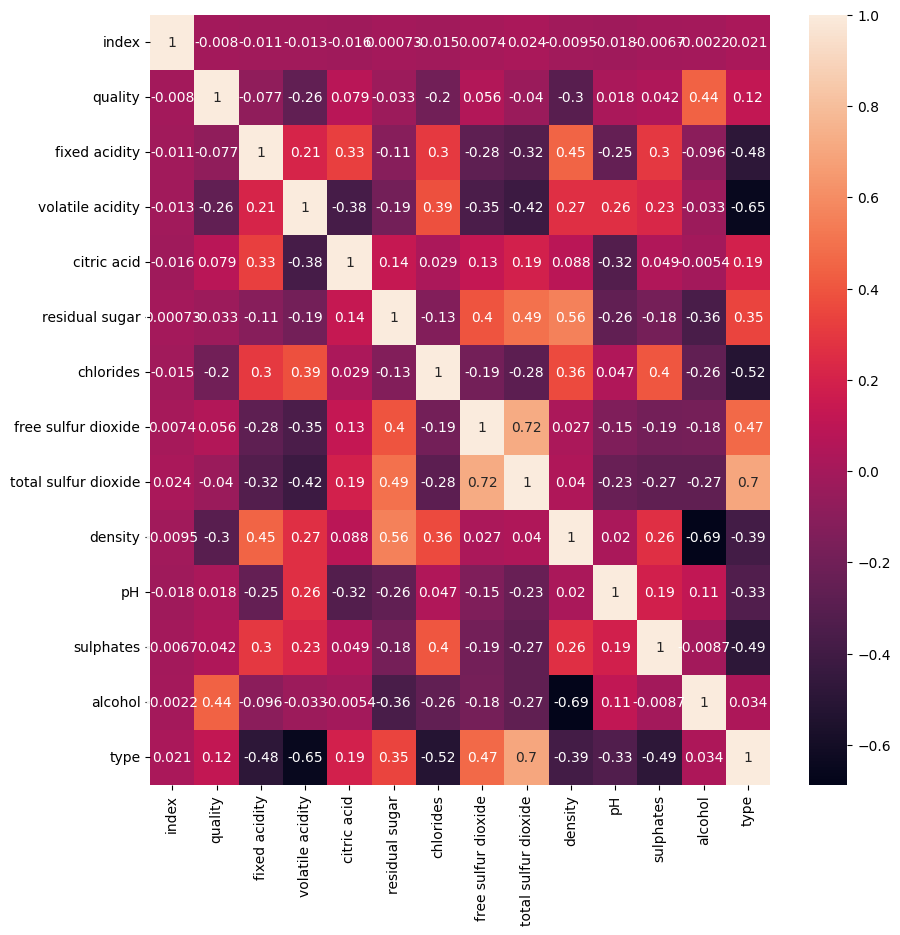

In [ ]:
# train의 변수 간 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(data = train.corr(), annot=True)

2. 타겟 변수 확인 : quality

In [ ]:
value_counts = train['quality'].value_counts()
value_counts

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

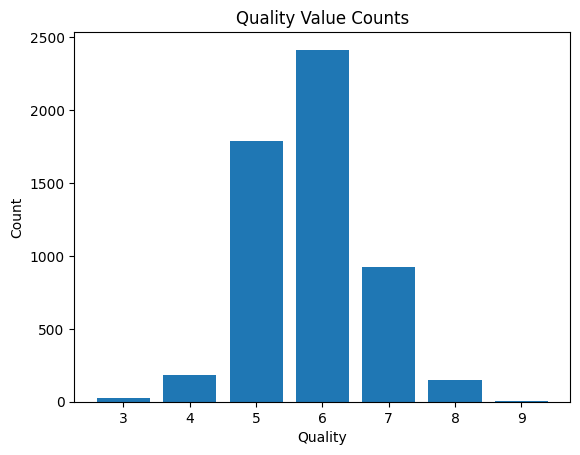

In [ ]:
plt.bar(value_counts.index, value_counts.values)
plt.title('Quality Value Counts')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

-> 균등하지 않은 분포

In [ ]:
#index 칼럼 제거
train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)

In [ ]:
train.shape, train.shape

((5497, 13), (5497, 13))

In [ ]:
#피처, 타켓 변수 분리
X_train = train.drop(['quality'], axis = 1) #피처
y_train = train['quality'] #타켓

분류 모델
- 랜덤 포레스트
- XGBoost
- LightGBM



# **랜덤 포레스트**

점수: 0.555

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#하이퍼 파라미터
params = {
    'n_estimators': [100,300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf':[1, 2, 3]
}

#객체 생성
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
gridcv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs = -1)
gridcv.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
#최적 파라미터로 모델 설정
rf_model = RandomForestClassifier(max_depth= 5, min_samples_split= 10, min_samples_leaf=3,
                                  n_estimators=100, random_state = 0, n_jobs = -1)

#모델 학습
rf_model.fit(X_train, y_train)

#test 데이터 예측
pred=rf_model.predict(test)

In [ ]:
#제출 파일 생성
submission_rf=pd.read_csv('/content/drive/MyDrive/24-1 ESAA/와인 품질 분류/sample_submission.csv')

In [ ]:
submission_rf['quality']=pred
submission_rf

,index,quality
0,0,6
1,1,5
2,2,5
3,3,6
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [ ]:
#파일 저장
submission_rf.to_csv('randomforest.csv', index=False)

점수: 0.695
(하이퍼 파라미터 하지 않은 경우)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 모델 선언
rf_model = RandomForestClassifier()

#모델 학습
rf_model.fit(X_train, y_train)

# 학습된 모델로 test 데이터 예측
pred1 = rf_model.predict(test)

In [ ]:
#제출 파일 생성
submission_rf=pd.read_csv('/content/drive/MyDrive/24-1 ESAA/와인 품질 분류/sample_submission.csv')

In [ ]:
submission_rf['quality']=pred1
submission_rf

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [ ]:
#파일 저장
submission_rf.to_csv('randomforest.csv', index=False)

# **XGBoost**

점수: 0.686

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np

In [ ]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train.le = le.fit_transform(y_train)

In [ ]:
#하이퍼 파라미터
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()
params = {'eta':[0.05,0.1],
          'n_estimators':[100,400],
          'max_depth': [5, 7] ,
          'min_child_weight': [1, 3] ,
          'colsample_bytree': [0.5, 0.75],
          'learning_rate':[0.01,0.05,0.07],
          'reg_alpha':[0.01,0.03,0.05]}

gridcv = GridSearchCV(xgb, param_grid=params, cv=3)
gridcv.fit(X_train, y_train.le)

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'eta': 0.05, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 400, 'reg_alpha': 0.03}


In [ ]:
xgb=XGBClassifier(colsample_bytree= 0.5, eta=0.05, learning_rate=0.05,
                  max_depth= 7, min_child_weight=1, n_estimators=400, reg_alpha=0.03)
xgb.fit(X_train, y_train.le,eval_metric='logloss')
pred2=xgb.predict(test)
#디코딩
pred3= le.inverse_transform(pred2)

In [ ]:
#제출 파일 생성
submission_xgb=pd.read_csv('/content/drive/MyDrive/24-1 ESAA/와인 품질 분류/sample_submission.csv')

In [ ]:
submission_xgb['quality'] = pred3
submission_xgb

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


In [ ]:
submission_xgb.to_csv('xgboost.csv', index=False)

# **LightGBM**

점수: 0.701

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
lgbm = LGBMClassifier(n_estimators=200)
lgbm.fit(X_train, y_train, eval_metric="logloss") #logloss 없어도 점수 동일하게 나옴
pred4 = lgbm.predict(test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 5497, number of used features: 12
[LightGBM] [Info] Start training from score -5.353861
[LightGBM] [Info] Start training from score -3.386211
[LightGBM] [Info] Start training from score -1.123105
[LightGBM] [Info] Start training from score -0.822089
[LightGBM] [Info] Start training from score -1.783246
[LightGBM] [Info] Start training from score -3.588077
[LightGBM] [Info] Start training from score -7.002520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [ ]:
#제출 파일 생성
submission_lgbm=pd.read_csv('/content/drive/MyDrive/24-1 ESAA/와인 품질 분류/sample_submission.csv')

In [ ]:
submission_lgbm['quality']=pred4
submission_lgbm

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,5
997,997,5
998,998,6


In [ ]:
submission_lgbm.to_csv('lightgbm.csv', index=False)